In [2]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

In [72]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [3]:
LIRE = gpd.read_parquet("../data/large_files/LIRE_deities.parquet")

In [60]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson")
pleiades_regions_merged = gpd.GeoSeries(pleiades_regions.unary_union)

In [31]:
roman_provinces = gpd.read_file("https://raw.githubusercontent.com/klokantech/roman-empire/master/data/provinces.geojson")

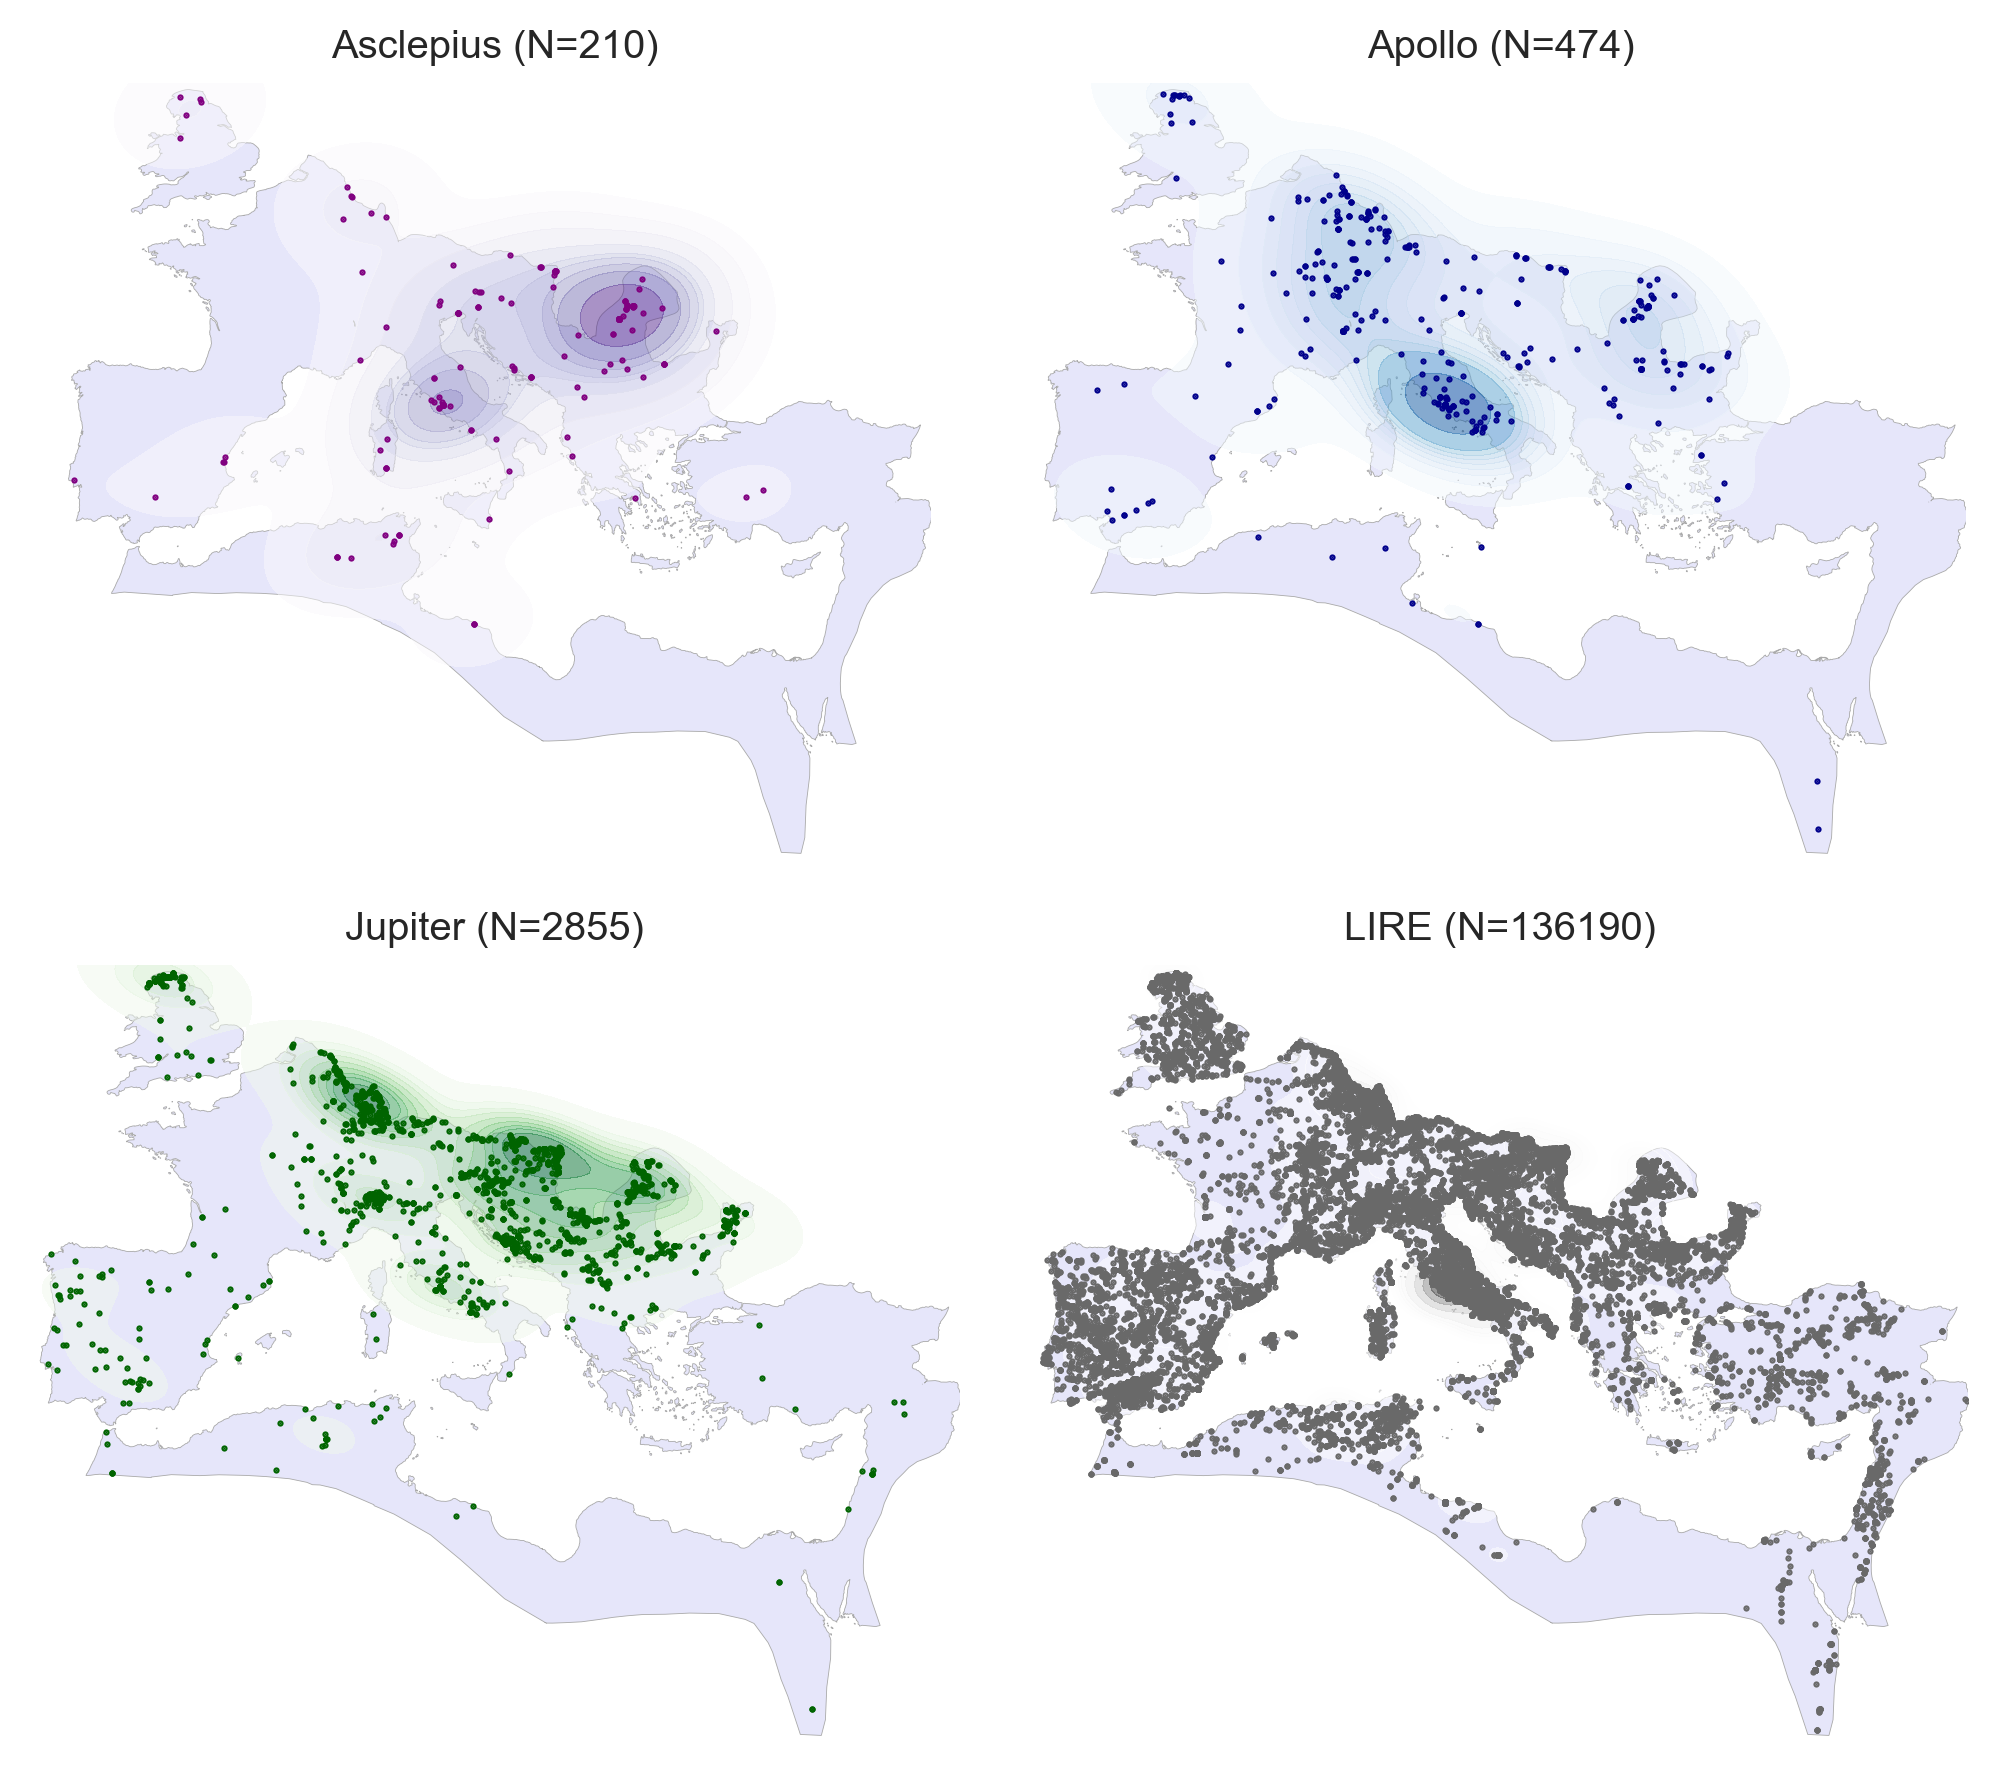

In [73]:
#color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
#colors: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, axs = plt.subplots(2,2, figsize=(7.48, 6), tight_layout=True)

for ax, subset, title, color, cmap in zip(
        axs.ravel(),
        [LIRE[LIRE["asclepius"]], LIRE[LIRE["apollo"]], LIRE[LIRE["jupiter"]], LIRE],
        ["Asclepius", "Apollo", "Jupiter", "LIRE"],
        ["purple", "darkblue", "darkgreen","dimgray"],
        ["Purples", "Blues", "Greens", "Greys"]):
    pleiades_regions_merged.plot(ax=ax, edgecolor="darkgrey" , linewidth=0.2, color="lavender")
    gplt.kdeplot(subset, cmap=plt.get_cmap(cmap), ax=ax, alpha=0.5, shade=True, zorder=2)
    subset.plot(ax=ax, marker=".", markersize=1, color=color, zorder=3)
    ax.set_axis_off()
    ax.set_xlim(-10, 41)
    ax.set_ylim(22, 55.5)
    ax.set_title(title + " (N={0})".format(str(len(subset))))

In [74]:
save_figure(fig, "spatial_distribution")